### 차원

- 텐서의 각 차원은 데이터가 쌓이는 방식과 데이터를 포함하는 개수를 나타냅니다. 예를 들어 (2, 3, 4)라는 shape의 텐서는:
  - 2개의 층을 가지고,
  - 각 층에 3개의 행렬이 있으며,
  - 각 행렬에는 4개의 값이 포함되어 있습니다.


In [1]:
import tensorflow as tf

# (2, 3, 4) 형태의 텐서 생성
x = tf.constant([
    [   # 첫 번째 층 (0번째 인덱스)
        [1, 2, 3, 4],    # 첫 번째 행
        [5, 6, 7, 8],    # 두 번째 행
        [9, 10, 11, 12]  # 세 번째 행
    ],
    [   # 두 번째 층 (1번째 인덱스)
        [13, 14, 15, 16], # 첫 번째 행
        [17, 18, 19, 20], # 두 번째 행
        [21, 22, 23, 24]  # 세 번째 행
    ]
])

print(x.shape)  # 출력: (2, 3, 4)
print(x)


(2, 3, 4)
tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int32)


### 퍼셉트론

- FC(Dense) Layer : 한층이 다른층과 모두 연결되어 있는경우
- MLP: 입력레이어와 하나 이상의 히든레이어, 그리고 출력 레이어로 구성되어있는 퍼셉트론

### 전형적인 퍼셉트론 구조

- 뉴런수, 손실함수, 액티베이션 함수


In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils import plot_model

print(tf.__version__)
print(keras.__version__)

2.16.2
3.6.0


### 시퀀셜 API


In [27]:
fashion_mnist = keras.datasets.fashion_mnist
# load data
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# check shape
print(X_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [28]:
# Split test and train
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# for y label
class_names = ["Tshart/top", "Trouser", "Pullover", "Dress","Coat","Sandal", "Shirt", "Sneaker", "Bag","Ankle Boot"]

In [29]:
# Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu")) # 1 배열로 변환 -> X.reshape(-1,28*28)
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# show summary
model.summary()

# compile the model
"""
Loss functions
    분류용:
        "sparse_categorical_crossentropy": 클래스가 정수로 레이블된 다중 클래스 분류에 사용됩니다.
        "categorical_crossentropy": 클래스가 원핫 인코딩으로 레이블된 다중 클래스 분류에 사용됩니다.
        "binary_crossentropy": 이진 분류에 적합한 손실 함수입니다.
    회귀용:
        "mean_squared_error" 또는 "mse": 평균 제곱 오차, 회귀 문제에 자주 사용됩니다.
        "mean_absolute_error" 또는 "mae": 평균 절대 오차, 예측값과 실제 값 사이의 절대 차이를 계산합니다.
        "mean_absolute_percentage_error" 또는 "mape": 평균 절대 백분율 오차, 예측값과 실제 값의 비율 차이를 백분율로 계산합니다.

optimizers
    "sgd": 확률적 경사 하강법(Stochastic Gradient Descent)
    "rmsprop": 학습 속도를 조절하는 RMSProp 알고리즘
    "adam": Adam 최적화기 (경사 하강법과 모멘텀을 결합한 최적화) tf.keras.optimizers.Adam(learning_rate=0.001)
    "adagrad": 학습 속도를 데이터에 맞춰 자동 조정합니다.


metric: 평가 지표 
    분류용:
        "accuracy" 또는 "acc": 정확도, 예측이 맞는 샘플의 비율
        "precision": 양성 예측 중 올바르게 예측된 양성의 비율
        "recall": 실제 양성 중 올바르게 예측된 양성의 비율
        "f1_score": 정밀도와 재현율의 조화 평균 (Keras에서는 직접 구현해야 함)
    회귀용:
        "mae": 평균 절대 오차
        "mse": 평균 제곱 오차
        "mean_absolute_percentage_error" 또는 "mape": 예측과 실제 값의 백분율 오차
        "cosine_proximity": 두 벡터 간의 코사인 유사도
"""
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7829 - loss: 0.6076 - val_accuracy: 0.8606 - val_loss: 0.3844
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8641 - loss: 0.3694 - val_accuracy: 0.8664 - val_loss: 0.3748
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8802 - loss: 0.3261 - val_accuracy: 0.8816 - val_loss: 0.3305
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8839 - loss: 0.3054 - val_accuracy: 0.8798 - val_loss: 0.3293
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8925 - loss: 0.2888 - val_accuracy: 0.8860 - val_loss: 0.3189
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8984 - loss: 0.2694 - val_accuracy: 0.8902 - val_loss: 0.2995
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9049 - loss: 0.2545 - val_accuracy: 0.8898 - val_loss: 0.3156
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9048 - loss: 0.2504 - 

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
np.array(class_names)[y_proba.argmax(axis = 1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U10')

# 시퀀셜 API 회귀용


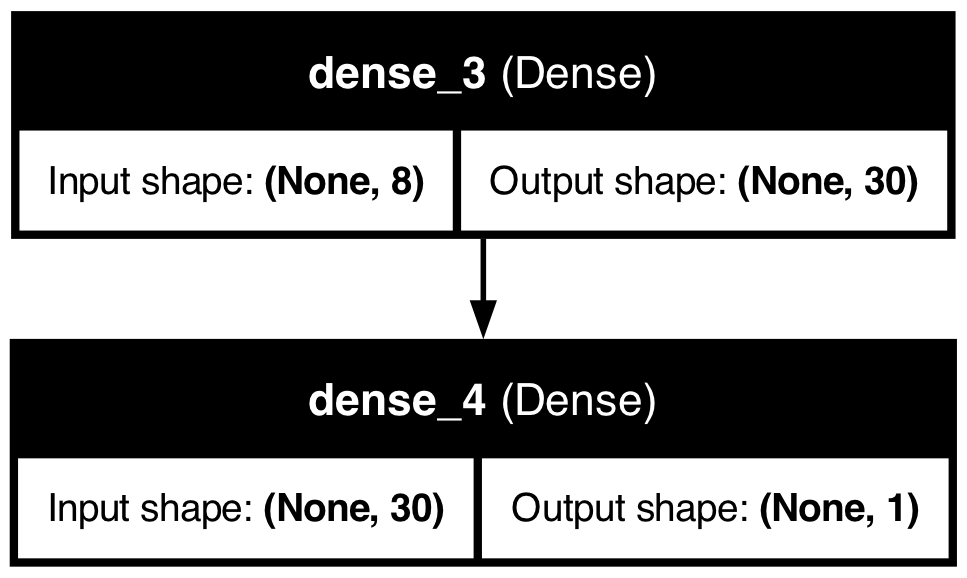

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)      # 학습된 스케일러로 변환
X_test = scaler.transform(X_test)   

model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),  # 입력 형태를 명시적으로 정의
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [6]:
model.compile(loss = 'mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 1.1328 - val_loss: 0.7247
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 0.5630 - val_loss: 0.4930
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.4675 - val_loss: 0.4741
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.4644 - val_loss: 0.4595
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.4509 - val_loss: 0.4527
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.4416 - val_loss: 0.4543
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 0.4379 - val_loss: 0.4452
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.4326 - val_loss: 0.4391
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.3959 - val_loss: 0.4463
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.4249 - val_loss: 0.4350
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.4049 - val_loss: 0.4350
Epoch 12/20
363/363 ━━━━━━━━━━

array([[0.85080326],
       [1.1136968 ],
       [0.72425056]], dtype=float32)

# 함수형 API

- 순차적이지 않고 입력이 여러개인 신경망을 만들때 사용


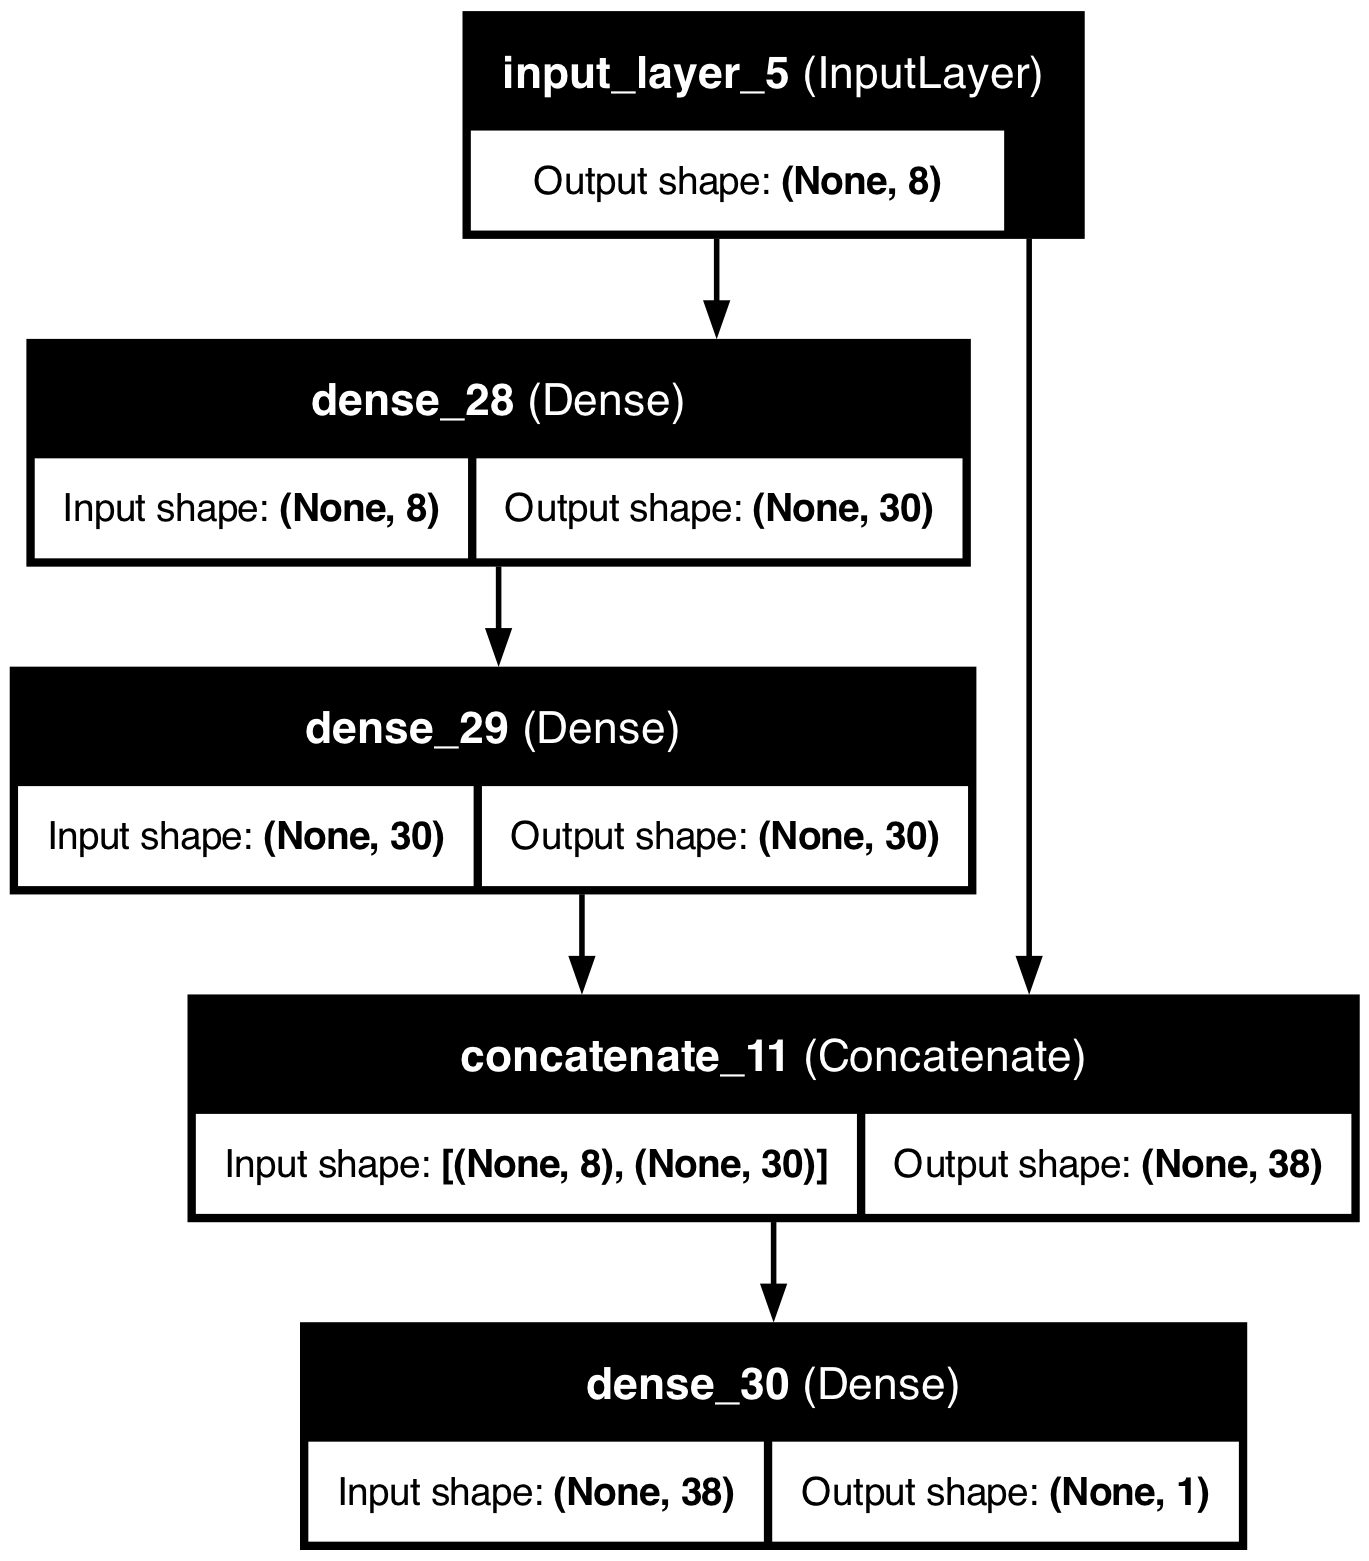

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)      # 학습된 스케일러로 변환
X_test = scaler.transform(X_test)   

input_ = keras.layers.Input(shape = X_train.shape[1:]) # 특성 수
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2]) # 짧은 경로 구현
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output]) # 입출력을 지정하여 모델 생성

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
model.compile(loss = 'mse', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
  2/363 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 2.691577

/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_51']. Received: the structure of inputs=*
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.9565 - val_loss: 0.4926
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.5892 - val_loss: 0.4563
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0878 - val_loss: 0.4500
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 2.8456 - val_loss: 0.4812
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: nan - val_loss: nan


In [9]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.3307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.64646  ],
       [1.7998161],
       [1.6368806]], dtype=float32)

### 입력층이 여러개인 함수형 API


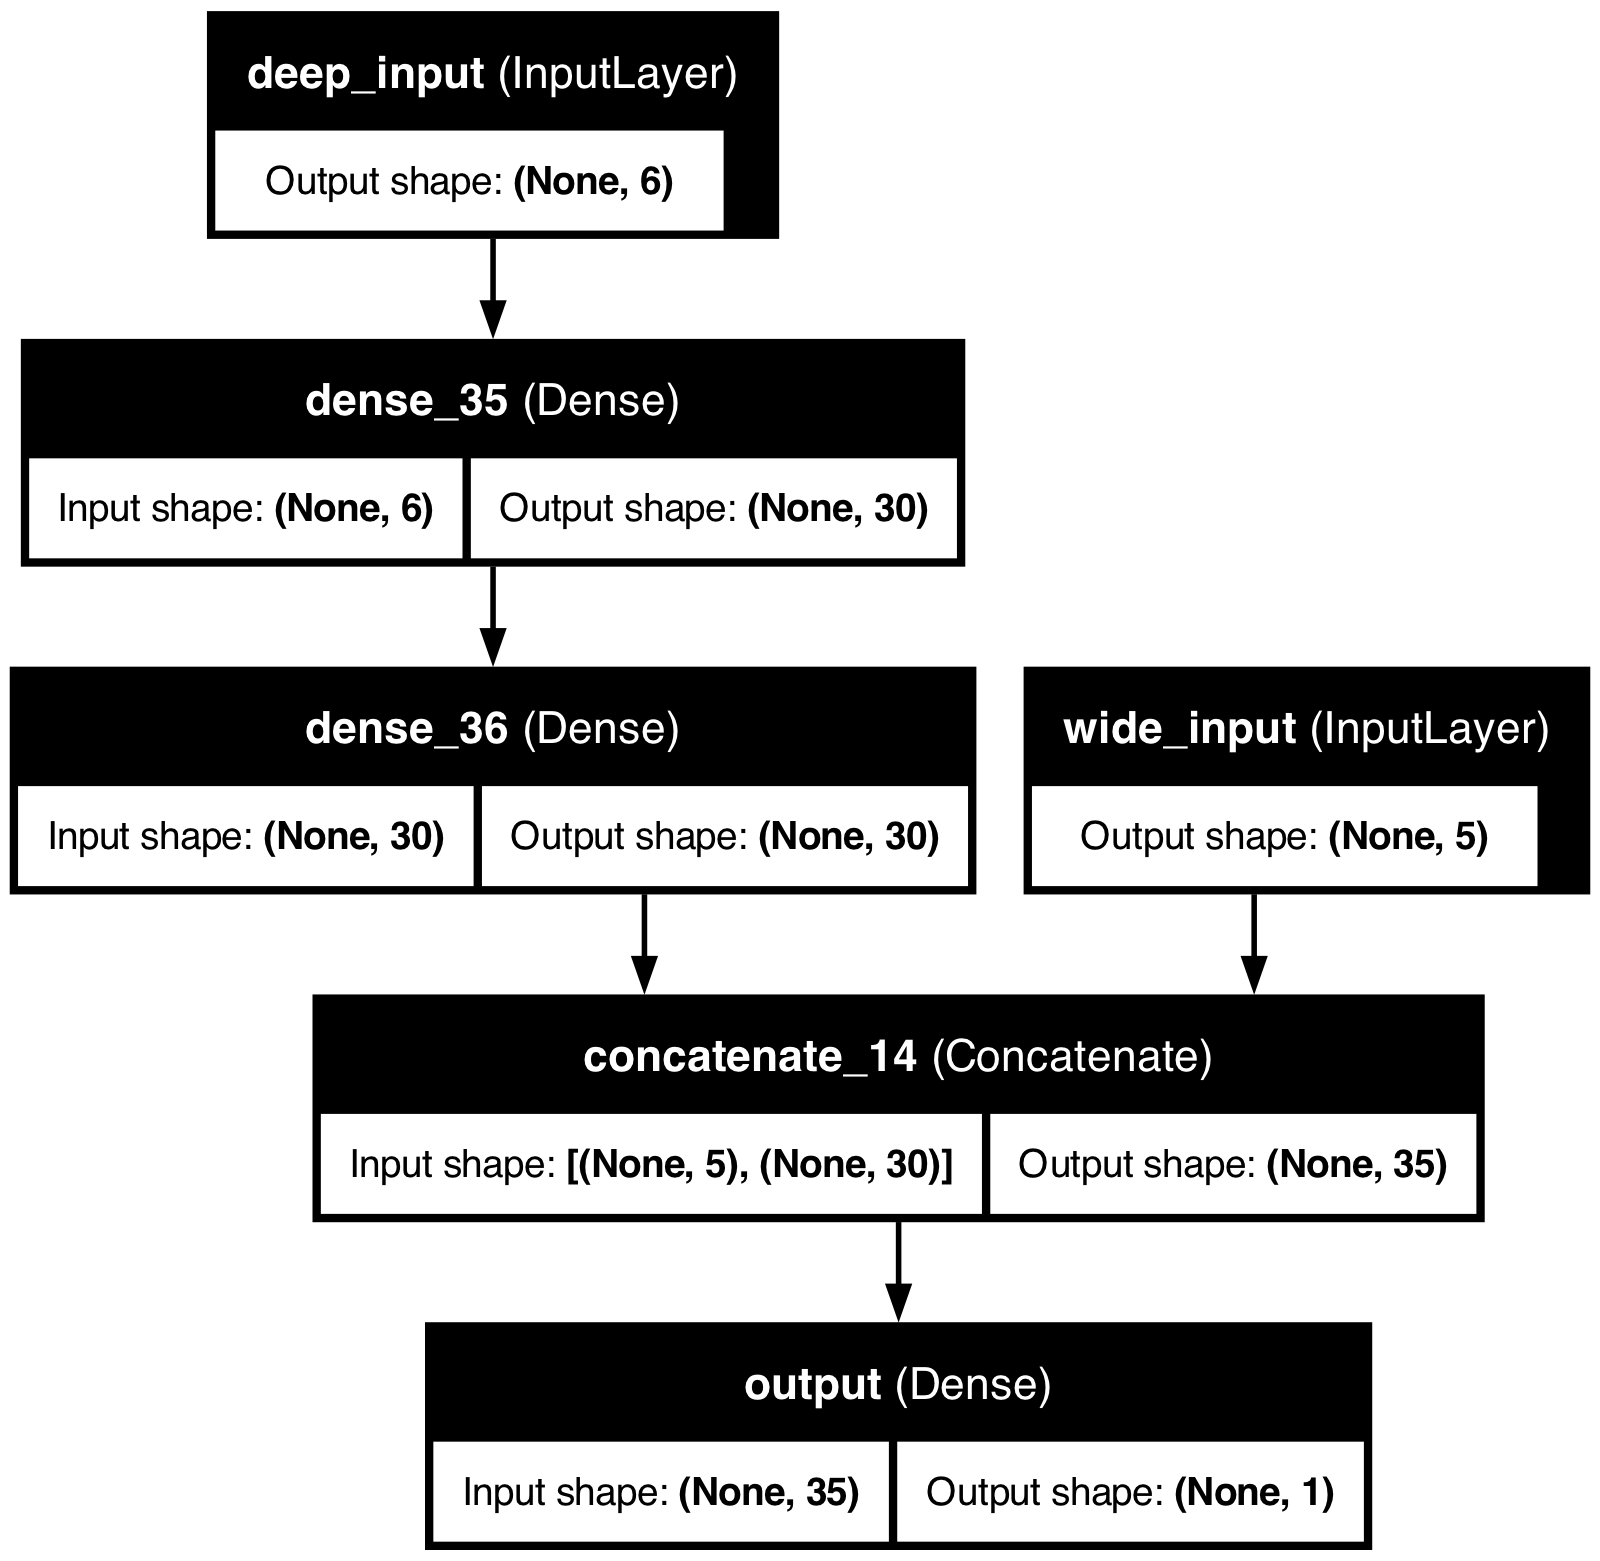

In [60]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)      # 학습된 스케일러로 변환
X_test = scaler.transform(X_test)   

input_A = keras.layers.Input(shape = [5],name = 'wide_input') # 특성 수 5개만 인풋으로 보냄
input_B = keras.layers.Input(shape = [6],name = 'deep_input') # 특성 수 6 개만 인풋으로 보냄
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2]) # 짧은 경로 구현
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A,input_B], outputs = [output]) # 입출력을 지정하여 모델 생성

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [52]:
model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate = 0.003))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test[:3, :5], X_test[:3, 2:]

history = model.fit([X_train_A, X_train_B],
                    y_train,
                    epochs=20,
                    validation_data = ([X_valid_A, X_valid_B], y_valid)
                    )

Epoch 1/20
201/363 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 3.2678

/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['wide_input', 'deep_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 2.6226 - val_loss: 2.8365
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.5977 - val_loss: 0.6710
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.5347 - val_loss: 0.5204
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.4927 - val_loss: 0.4887
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.4495 - val_loss: 0.4642
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.4367 - val_loss: 0.4529
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.4323 - val_loss: 0.4468
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.4163 - val_loss: 0.4398
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.4087 - val_loss: 0.4358
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.4257 - val_loss: 0.4314
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.4054 - val_loss: 0.4330
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.4374


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[1.8267062 ],
       [2.0127685 ],
       [0.78082967]], dtype=float32)

## 모델 저장과 로드


In [55]:
model.save('my_model.h5')
model = keras.models.load_model('my_model.h5')
model.predict((X_new_A, X_new_B))

### 함수형 API + 콜백 활용

- 조기 종료 구현
- 체크 포인트 기억 ( 과대적합 방지)


In [73]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)      # 학습된 스케일러로 변환
X_test = scaler.transform(X_test)   

input_A = keras.layers.Input(shape = [5],name = 'wide_input') # 특성 수 5개만 인풋으로 보냄
input_B = keras.layers.Input(shape = [6],name = 'deep_input') # 특성 수 6 개만 인풋으로 보냄
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2]) # 짧은 경로 구현
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A,input_B], outputs = [output]) # 입출력을 지정하여 모델 생성


checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate = 0.003))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test[:3, :5], X_test[:3, 2:]

history = model.fit([X_train_A, X_train_B],
                    y_train,
                    epochs=300,
                    validation_data = ([X_valid_A, X_valid_B], y_valid),
                    callbacks = [checkpoint_cb, early_stoping_cb]
                    )


model = keras.models.load_model('my_keras_model.keras')
model.predict((X_new_A, X_new_B))


Epoch 1/300
207/363 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 2.5603 

/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['wide_input', 'deep_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 2.0414 - val_loss: 0.6674
Epoch 2/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.6324 - val_loss: 0.5791
Epoch 3/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.5776 - val_loss: 0.5483
Epoch 4/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.5004 - val_loss: 0.5217
Epoch 5/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.5110 - val_loss: 0.5044
Epoch 6/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.4924 - val_loss: 0.4945
Epoch 7/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.4698 - val_loss: 0.4922
Epoch 8/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.4662 - val_loss: 0.5026
Epoch 9/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.4658 - val_loss: 0.4769
Epoch 10/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.4379 - val_loss: 0.5156
Epoch 11/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.4466 - val_loss: 0.4651
Epoch 12/300
363/363 ━━━━━━━━━━

array([[3.2216625],
       [1.8700073],
       [2.814922 ]], dtype=float32)

### 텐서보드 시각화


In [74]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit([X_train_A, X_train_B],
                    y_train,
                    epochs=300,
                    validation_data = ([X_valid_A, X_valid_B], y_valid),
                    callbacks = [checkpoint_cb, early_stoping_cb, tensorboard_cb]
                    )

Epoch 1/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.3111 - val_loss: 0.3245
Epoch 2/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.3195 - val_loss: 0.3285
Epoch 3/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.3170 - val_loss: 0.3230
Epoch 4/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.3125 - val_loss: 0.3261
Epoch 5/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.3117 - val_loss: 0.3235
Epoch 6/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.3273 - val_loss: 0.3243
Epoch 7/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.3192 - val_loss: 0.3300
Epoch 8/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.3173 - val_loss: 0.3268
Epoch 9/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.3130 - val_loss: 0.3221
Epoch 10/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.3193 - val_loss: 0.3228
Epoch 11/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.3162 - val_loss: 0.3274
Epoch 12/300
363/36

In [ ]:
#tensorboard --logdir=./my_logs --port=6006 -> 다음 코드를 실행 

### 하이퍼 파라미터 튜닝

- 커널 초기화 전략: 훈련중 그래디언트 소실 혹은 폭주 방지

  - he_normal -> Relu
  - 글로럿 -> 소프트멕스, tanh

- 배치 노말라이제이션: 훈련중 그래디언트 소실 혹은 폭주 방지

- 옵티마이저 -> 아담이 최고

- 규제

  - l1, l2
  - 드롭아웃

- regularized dense 를 쓰는것도 좋은 방법 -> 리팩토링이 쉬워짐


In [84]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils import plot_model

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)      # 학습된 스케일러로 변환
X_test = scaler.transform(X_test)   

input_A = keras.layers.Input(shape = [5],name = 'wide_input') # 특성 수 5개만 인풋으로 보냄
input_B = keras.layers.Input(shape = [6],name = 'deep_input') # 특성 수 6 개만 인풋으로 보냄

hidden1 = keras.layers.Dense(30, activation='relu', kernel_initializer="he_normal", kernel_regularizer= keras.regularizers.l2(0.01), name ='hidden1')(input_B)
hidden1 = keras.layers.BatchNormalization()(hidden1)  # hidden1 뒤에 배치 정규화 적용
hidden1 = keras.layers.Dropout(0.3)(hidden1) # 드롭아웃적용

hidden2 = keras.layers.Dense(30, activation='relu', kernel_initializer="he_normal", kernel_regularizer= keras.regularizers.l2(0.01),name = 'hidden2')(hidden1)
hidden2 = keras.layers.BatchNormalization()(hidden2)  # hidden2 뒤에 배치 정규화 적용
hidden2 = keras.layers.Dropout(0.3)(hidden2) # 드롭아웃 적용

concat = keras.layers.Concatenate()([input_A, hidden2]) # 짧은 경로 구현
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A,input_B], outputs = [output]) # 입출력을 지정하여 모델 생성



checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate = 0.003, beta_1=0.9, beta_2=0.999))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test[:3, :5], X_test[:3, 2:]


#로그 기록용
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


## 콜백 함수 지정
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit([X_train_A, X_train_B],
                    y_train,
                    epochs=300,
                    validation_data = ([X_valid_A, X_valid_B], y_valid),
                    callbacks = [checkpoint_cb, early_stoping_cb, tensorboard_cb]
                    )




model = keras.models.load_model('my_keras_model.keras')
model.predict((X_new_A, X_new_B))


Epoch 1/300


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['wide_input', 'deep_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 5.0101 - val_loss: 1.5341
Epoch 2/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 1.5780 - val_loss: 0.9684
Epoch 3/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.9925 - val_loss: 0.7517
Epoch 4/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.7443 - val_loss: 0.6335
Epoch 5/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.6153 - val_loss: 0.5108
Epoch 6/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.5391 - val_loss: 0.5165
Epoch 7/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.5114 - val_loss: 0.5166
Epoch 8/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.5038 - val_loss: 0.4701
Epoch 9/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.4619 - val_loss: 0.4505
Epoch 10/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.4795 - val_loss: 0.4590
Epoch 11/300
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4775 - val_loss: 0.4682
Epoch 12/300
363/363 ━━━━━━━━━━

array([[1.0476179],
       [0.6978395],
       [2.0027668]], dtype=float32)

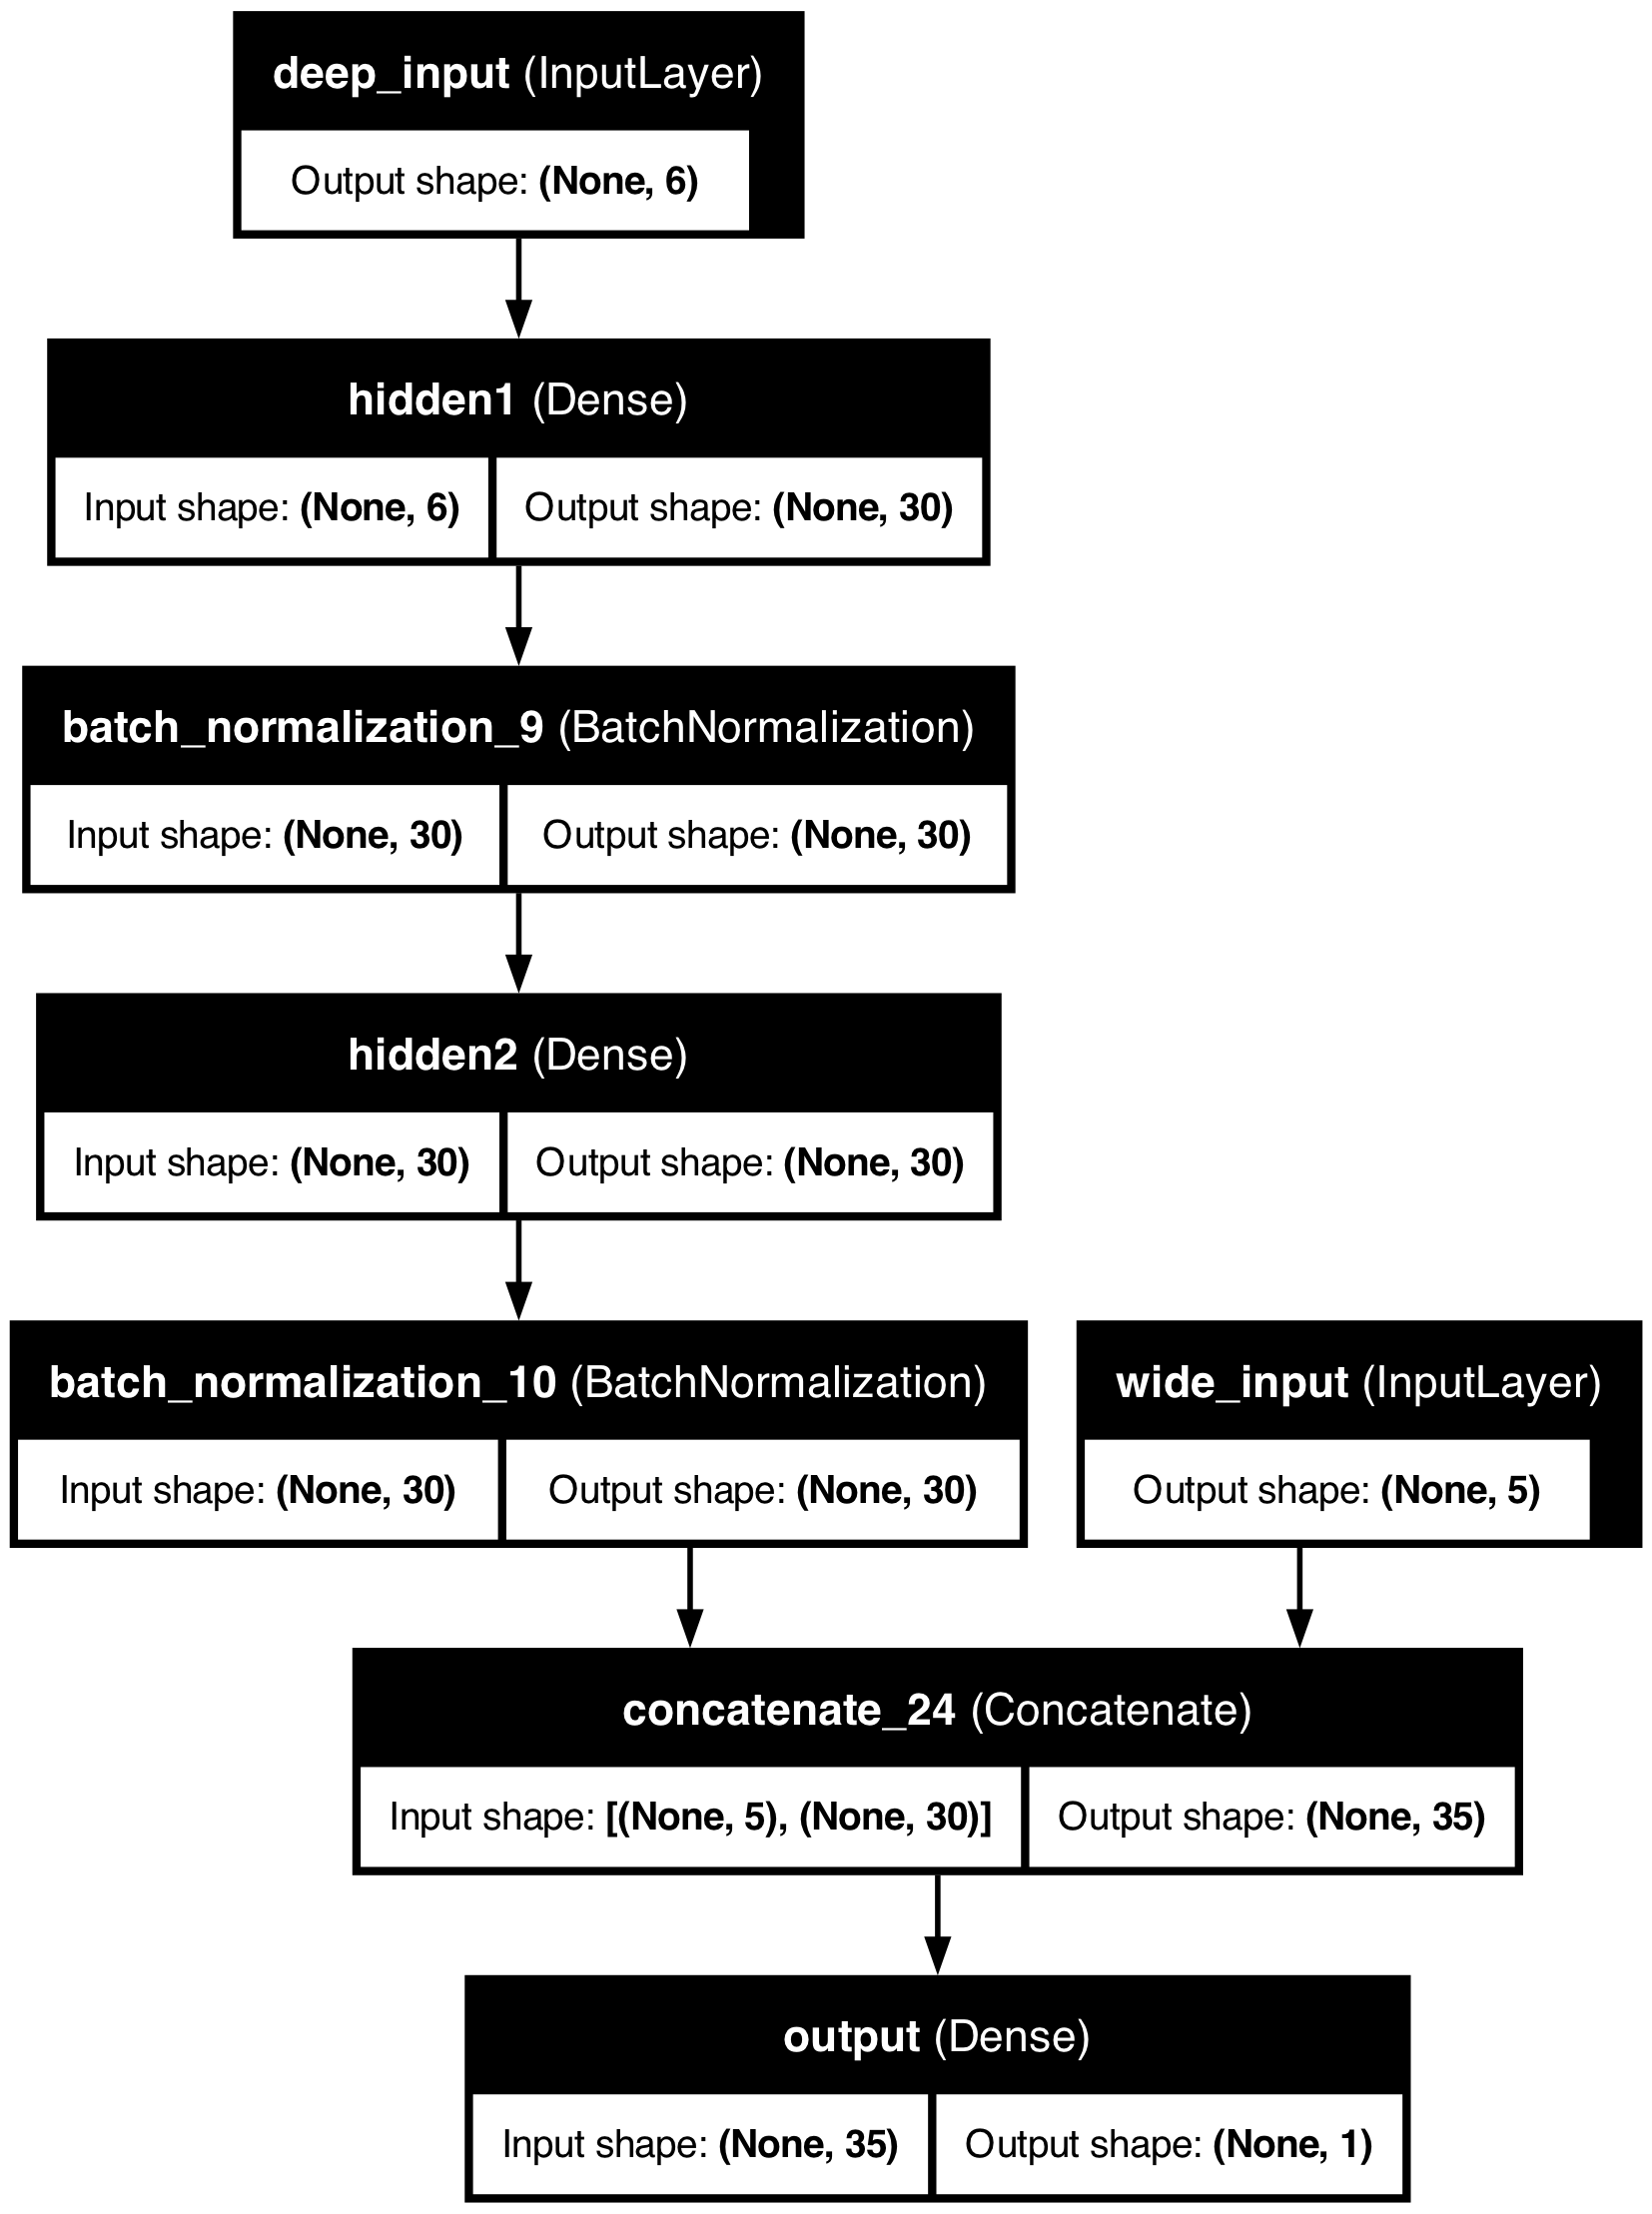

In [80]:
# 모델 그리기
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
